In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
class CNNClassifier(nn.Module):
    def __init__(self, i):
        super(CNNClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 2**i, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(2**i, 2**(i+1), kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(2**(i+1), 2**i, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2)
        )
        self.classification_head = nn.Linear(2**i, 10, bias=True)
        
    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(features.shape[0], -1))

In [3]:
def train(model, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [4]:
def test(model):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    return 100. * correct / len(test_loader.dataset)

In [5]:
EPOCHS = 5
BATCH_SIZE_TRAIN = 64
BATCH_SIZE_TEST = 1000
LR = 0.01
LOG_INTERVAL = 100
RANDOM_SEED = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(RANDOM_SEED)

In [6]:
train_dataset = MNIST('data/', train=True, download=True, transform=ToTensor())
test_dataset = MNIST('data/', train=False, download=True, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=True)

In [7]:
n_params = []
acc = []

for i in range(1, 7):
    print(f'Model Number {i}:')
    model = CNNClassifier(i).to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=LR)
    
    total_params = 0
    for param in model.parameters():
        total_params += param.numel()
    print('\tTotal Params: ', total_params)
    for epoch in range(1, EPOCHS + 1):
        print(f'\tTraining Epoch {epoch}')
        train(model, epoch)

    accuracy = test(model)
    print(f'\tTesting Accuracy: {accuracy}')
    n_params.append(total_params)
    acc.append(accuracy.item())
    print(f'\tFinished Training and Testing Model {i}\n')

Model Number 1:
	Total Params:  200
	Training Epoch 1


/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1702400440653/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 41.62999725341797
	Finished Training and Testing Model 1

Model Number 2:
	Total Params:  678
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 69.50999450683594
	Finished Training and Testing Model 2

Model Number 3:
	Total Params:  2498
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 89.11000061035156
	Finished Training and Testing Model 3

Model Number 4:
	Total Params:  9594
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 93.66999816894531
	Finished Training and Testing Model 4

Model Number 5:
	Total Params:  37610
	Training Epoch 1
	Training Epoch 2
	Training Epoch 3
	Training Epoch 4
	Training Epoch 5
	Testing Accuracy: 95.07999420166016
	Finished Training and Testing Model 5

Model Number 6:
	Total Params:  148

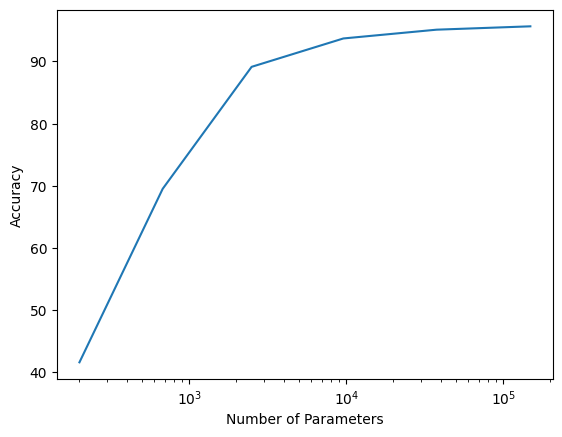

In [11]:
plt.plot(n_params, acc)
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()